# Section 1 : Submitter

**Submitter:
Eden Fabrikant

Kaggle link:
https://www.kaggle.com/edenfabrikant

# Section 2 : Overview

**House Prices Advanced Regression Techniques Competition - Project Overview**

In this Kaggle competition, we aim to predict the final sale price of homes located in Ames, Iowa, based on a diverse set of features.

As some people may put an emphasis on the number of rooms in the house, neighborhood or even the age of the house as the main predictor of the home price, we try to give more accurate predictions (SalePrice column) with many more features. In this competition we explore this feature with a given Dataset and utilize it for our model - minimizing the RMSE metric.

We will use a **Linear Regression model** to perform this prediction. Our workflow includes data exploration, processing of the data, statistical analyses, training the model, and evaluating its performance.  

# Section 3 : Imports and Definitions

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn import datasets
from sklearn import pipeline, preprocessing
from sklearn import metrics
from sklearn import linear_model
from sklearn import model_selection

import pandas as pd
import seaborn as sns # we will use it for showing the regression line

# define plt settings (you don't have to do it every time, you can you the default values)
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["figure.figsize"] = (20,10)

# Section 4 : Mount to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Path to the new folder inside my google drive
folder_path = '/content/drive/My Drive/House_Ames_price_predict'

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)


# Section 5 : Data Investigation and Preprocessing

We use the Ames Housing dataset that was compiled by Dean De Cock in this practice for the regression task.

we uploaded the train csv from the pc

In [ ]:

from google.colab import files

# This will open a file dialog to upload files from your computer
# uploading the train file
uploaded = files.upload()

Saving train.csv to train.csv


We use our train.csv input file.
The dataset variable called train_df.

We display the train file reseting the indexes.

pd - using the pandas library for reading the file and displaing it

numerical_train_df - including only the numerical column types.

In this project, we will not change object type since we didn't experiement with it yet in our course. we will handle only the numerical columns.

In [ ]:
#train_df - the dataset variable we work on
train_df = pd.read_csv('train.csv')

# Clearing the
train_df.reset_index(drop=True, inplace=True)
display(train_df)
print("Dataset shape: {}".format(train_df.shape))

# numerical_train_df - including only the numerical column types
numerical_train_df=train_df.select_dtypes(include=[np.number])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Dataset shape: (1460, 81)


The train.csv file is composed of 81 columns and 1460 entries.

The SalePrice column shows our true values (y).

Showing the columns names

In [ ]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Presenting the first 20 rows in the train data

In [ ]:
train_df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


We try to understand how many rows have no value in each column

In [ ]:
# Show only the columns that actually have NaNs
train_df.isna().sum()[train_df.isna().sum() > 0]

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


Displaying the type of each column

In [ ]:
train_df.dtypes.to_frame(name='dtype')

,dtype
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


Column type distribution

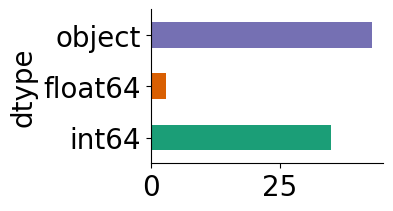

In [ ]:
plt.figure(figsize=(3, 2))
_df_0.groupby('dtype').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


Display the dataset info, count, Nan, columns type, etc. to understand the train set.

As we can see there is no high precentage of nulls in the numerical columns. T

Therefore, eliminating columns will be based on correlation and distribution of the feature.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

show train set statistics on each column

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


now we will delete the id column to avoid overfitting

In [ ]:
numerical_train_df = numerical_train_df.drop('Id', axis=1)

Showing the medians of each numeric column

In [ ]:
numerical_train_df.median(numeric_only=True)

,0
MSSubClass,50.0
LotFrontage,69.0
LotArea,9478.5
OverallQual,6.0
OverallCond,5.0
YearBuilt,1973.0
YearRemodAdd,1994.0
MasVnrArea,0.0
BsmtFinSF1,383.5
BsmtFinSF2,0.0


# Section 6 : Data Visualization

We want to Detect the most meaningful features in this dataset

## Section 6.1 : Histrogram

In this graphs we want to show the behavior of the numerical features that we suspect that are no good for our model.



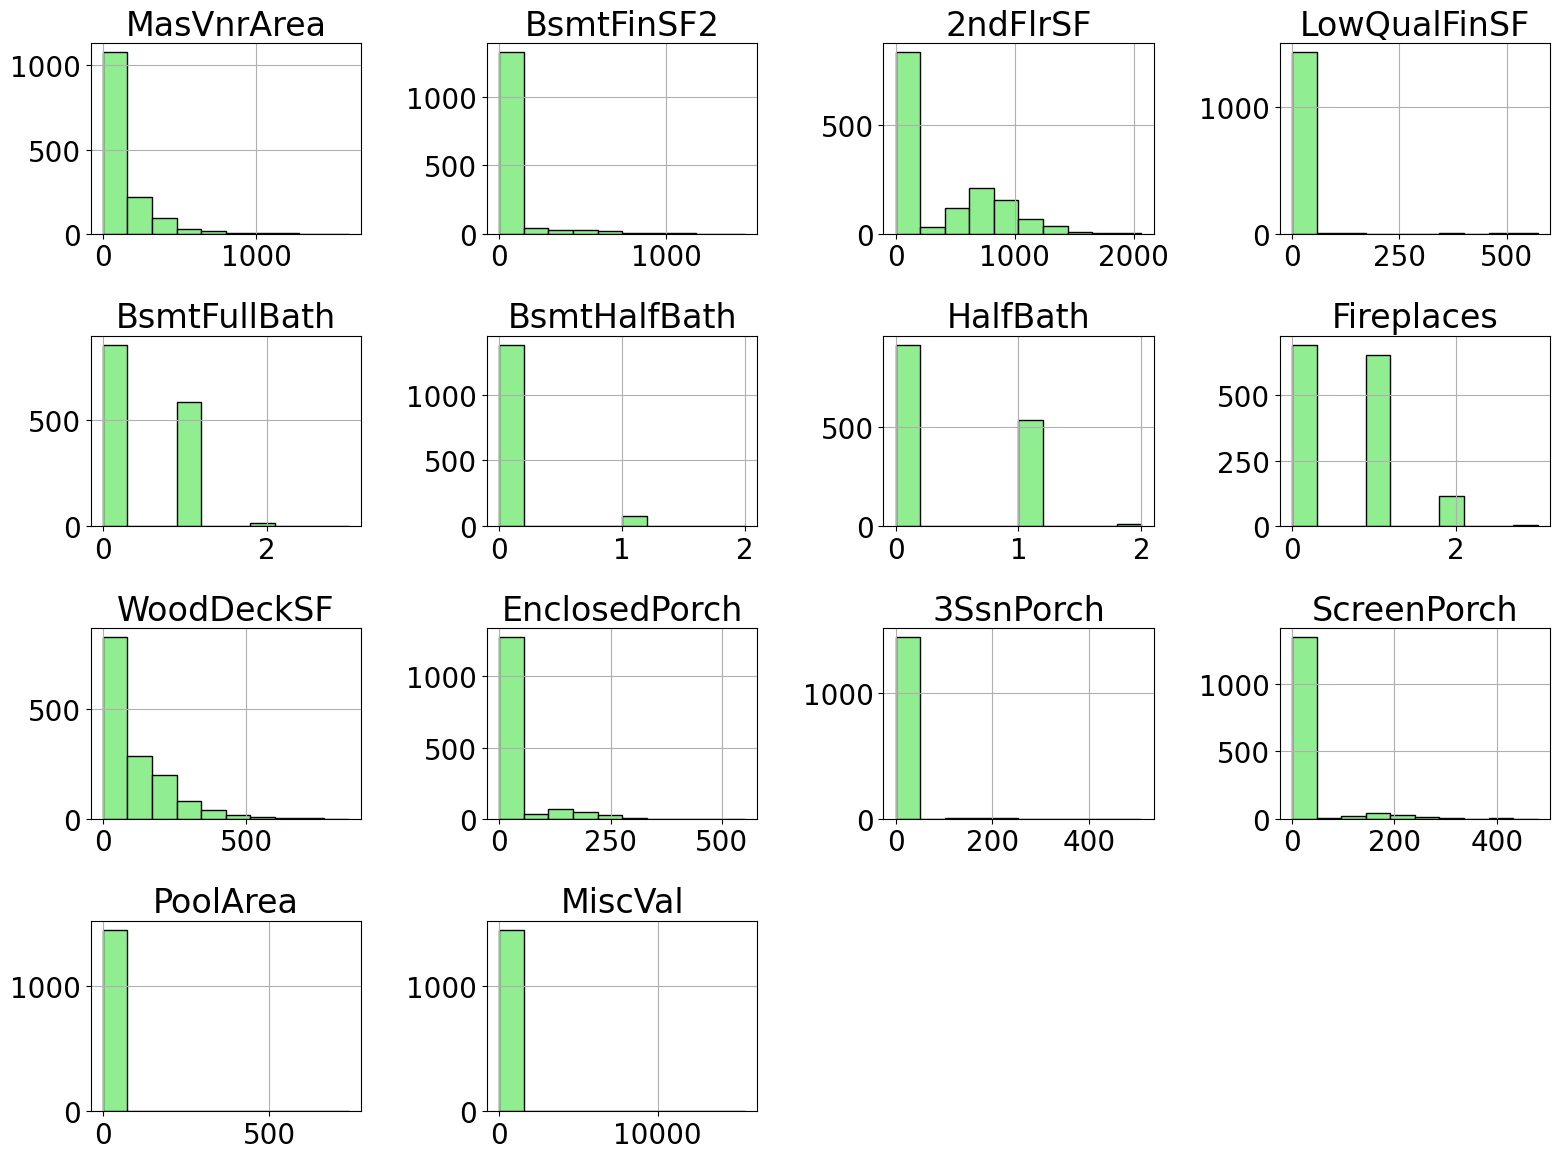

In [ ]:
# colums that we suspect will damage our model
cols = ['MasVnrArea', 'BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF',
        'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'Fireplaces',
        'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
        'PoolArea', 'MiscVal']

# size hist
plt.figure(figsize=(16, 12))

# cunducting a graph
for i, col in enumerate(cols, 1):
    plt.subplot(4, 4, i)
    train_df[col].hist(bins=10, color='lightgreen', edgecolor='black')
    plt.title(col)
    plt.tight_layout()

plt.show()


We can differ from these graphs that columns distribution of - 'BsmtHalfBath', '3SsnPorch', 'PoolArea', 'MiscVal' might harm the model. But it's not enough to delete these columns, so we will continue to investigate.

## Section 6.2 : Regplot

In this section, we are showing positive justification for the featuers that will stay in the model.

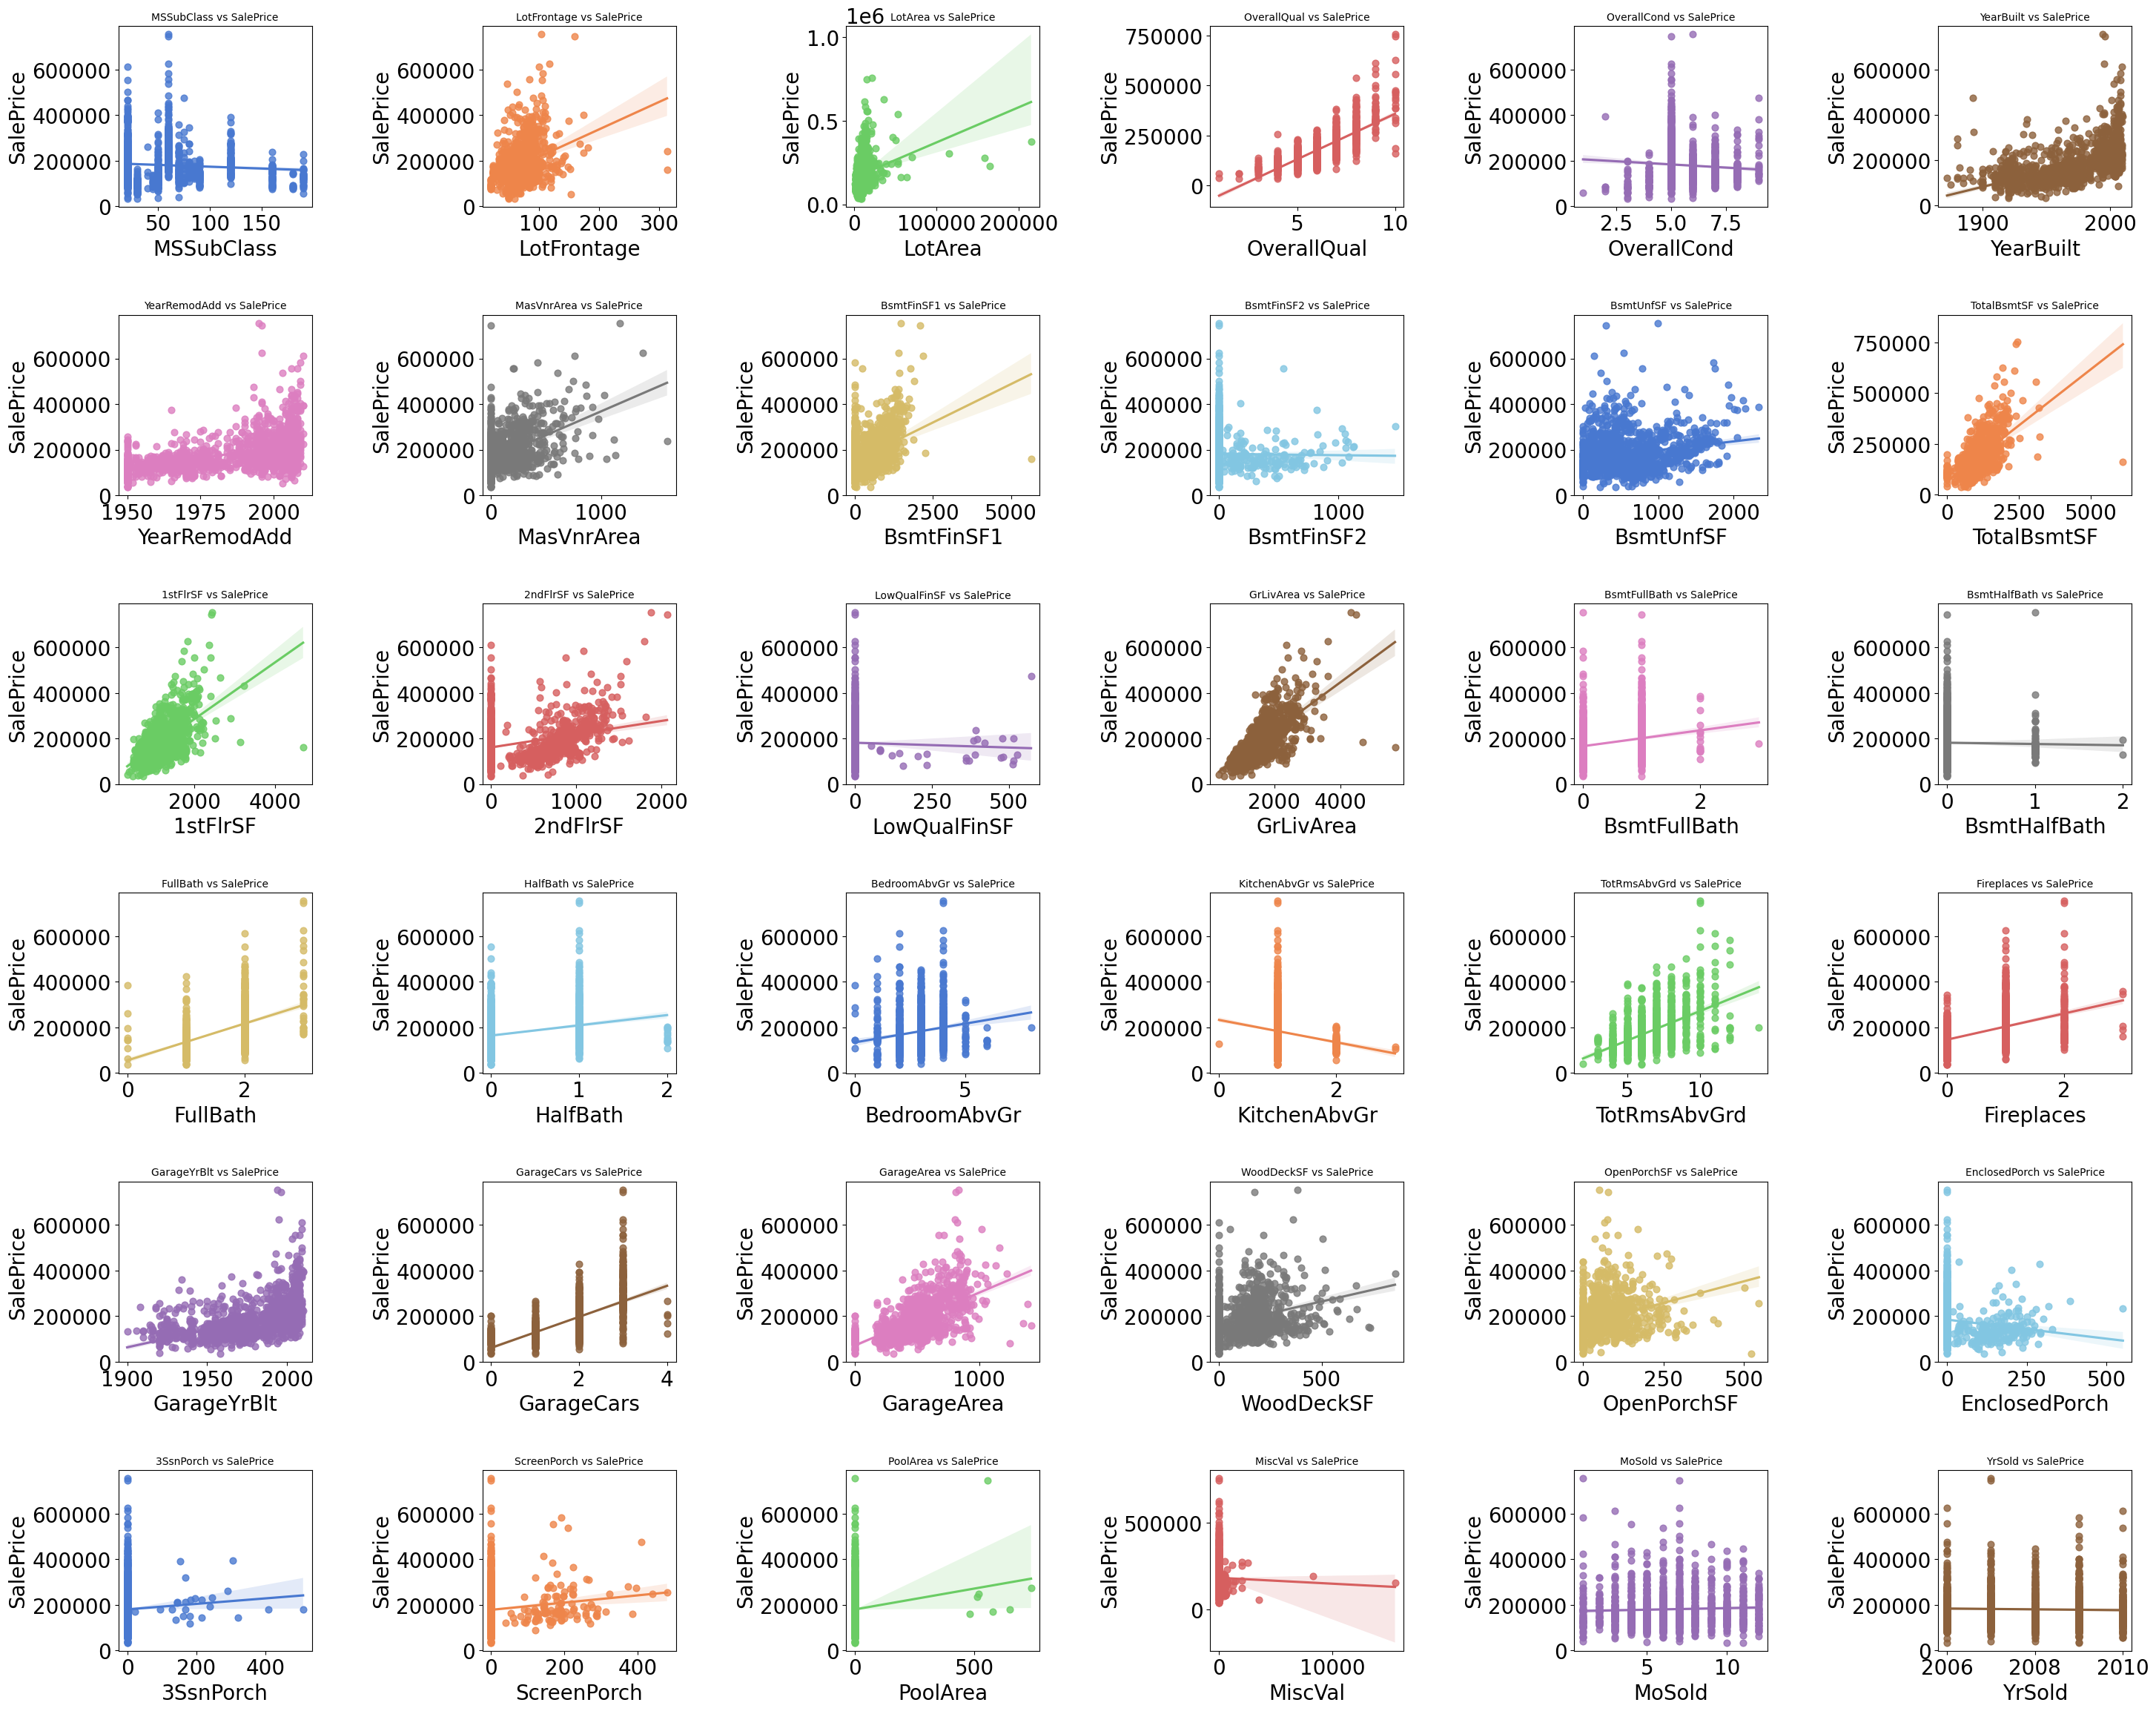

In [ ]:
def get_sns_cmap(n, name='muted'):
    return sns.color_palette(palette=name, n_colors=n)

def plot_reg_target_values_by_each_feature(df, target_column_name):
    features = df.columns[df.columns != target_column_name]
    n = len(features)
    nrows = math.ceil(math.sqrt(n))
    ncols = math.ceil(n / nrows)

    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
    axes = axes.flatten() if isinstance(axes, (list, np.ndarray)) else [axes]
    plt.subplots_adjust(hspace=0.6, wspace=0.6)

    colors = get_sns_cmap(n)

    for i, col in enumerate(features):
        sns.regplot(x=col, y=target_column_name, data=df, color=colors[i], ax=axes[i], scatter_kws={"s": 40})
        axes[i].set_title(f'{col} vs {target_column_name}', fontsize=10)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.tight_layout(pad=2.0)
    plt.show()

plot_reg_target_values_by_each_feature(numerical_train_df, 'SalePrice')

We will reffer to the suspicious columns.  

As we can see in the Regplot, the columns - 'PoolArea', 'MiscVal' might indeed
not be included in the training of the model.

As for the columns - 'BsmtHalfBath', '3SsnPorch', we can see a better scattering.

## Section 6.3 : Correlation matrix

We will display the correlation between each column and the true value ( 'SalePrice' ) with a heatmap (seaborn library)

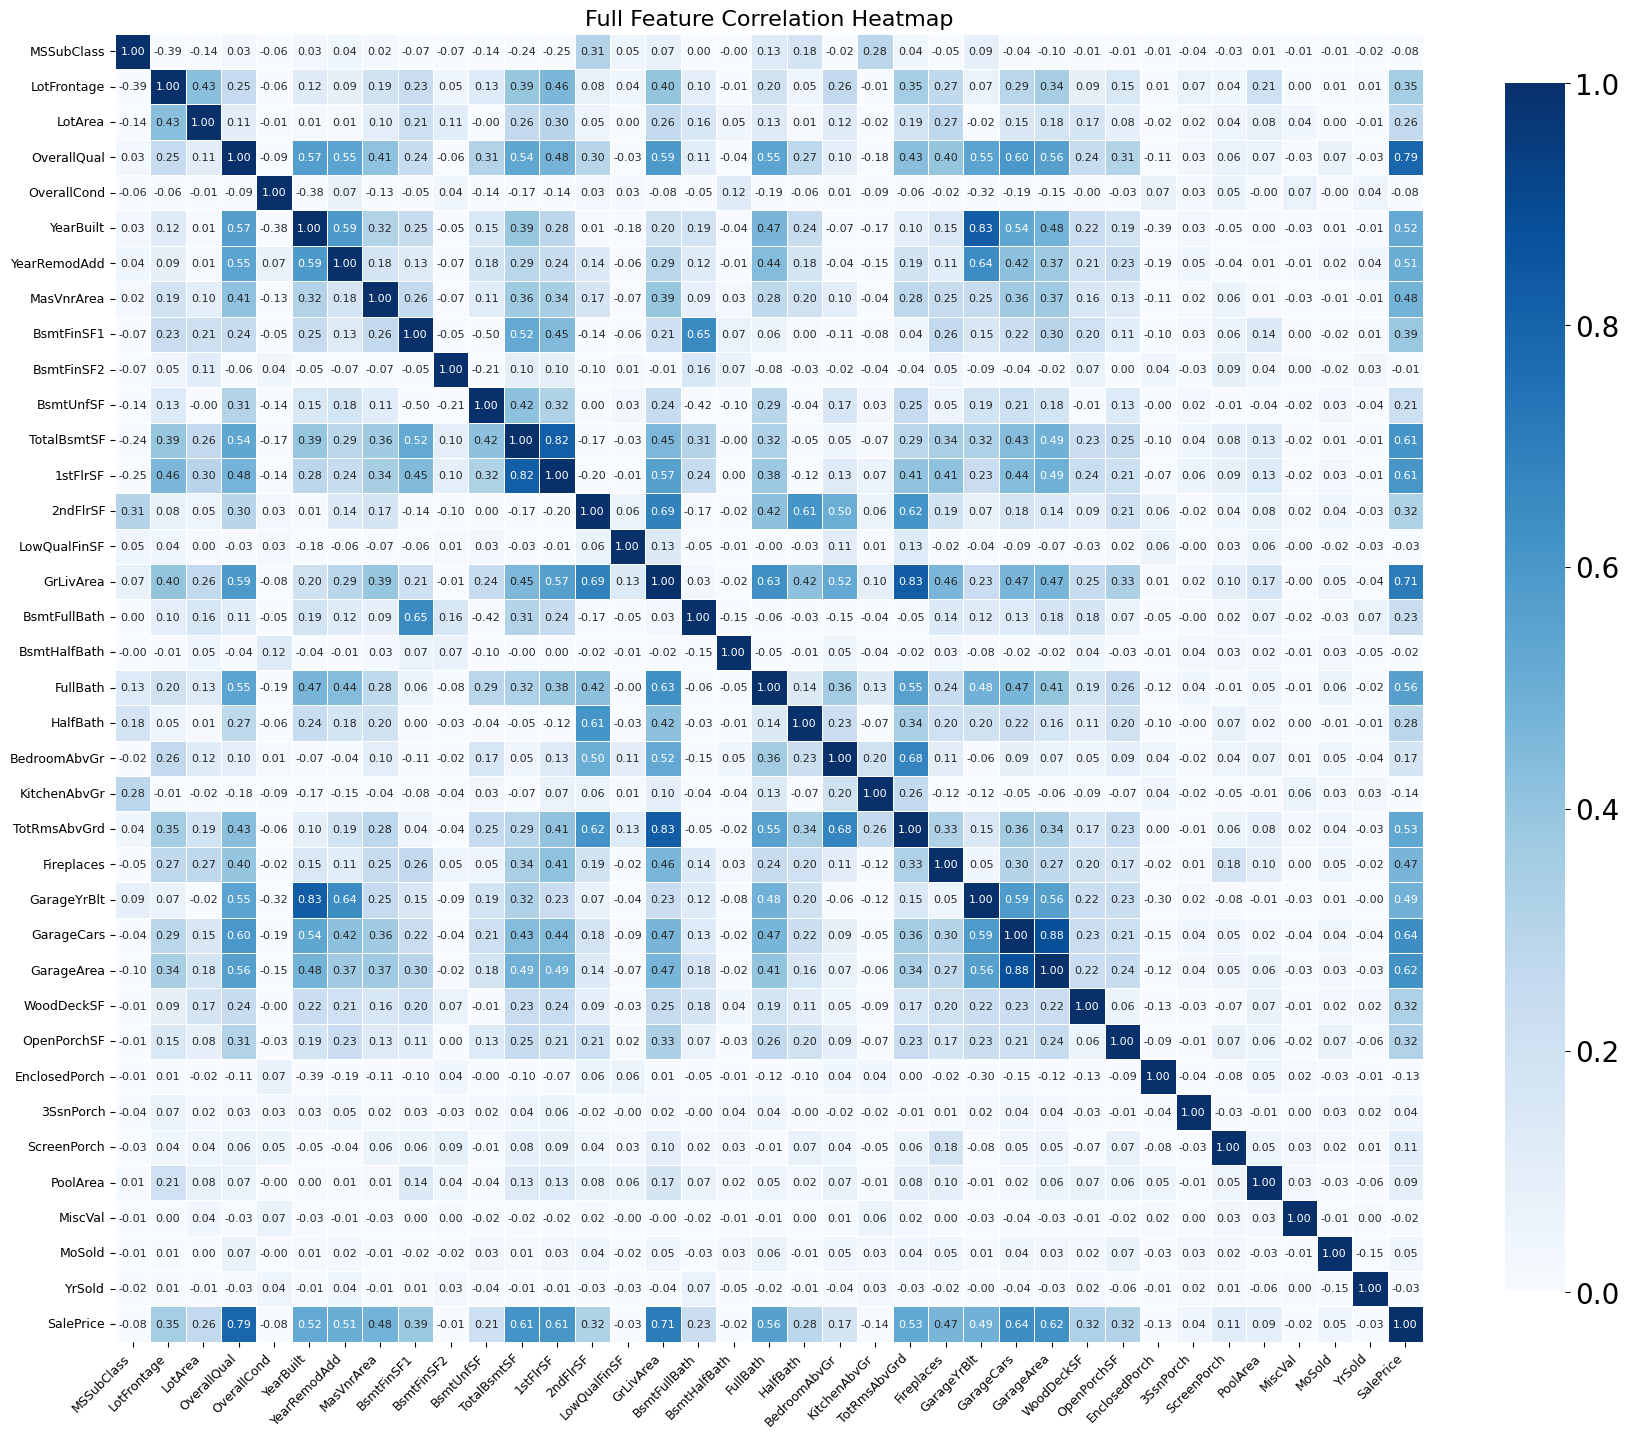

In [ ]:
# Compute absolute correlation matrix
cor = numerical_train_df.corr()

# Set figure size
plt.figure(figsize=(18, 16))

# Full heatmap (no mask!)
sns.heatmap(cor,
            cmap='Blues',
            annot=True,
            fmt=".2f",
            annot_kws={"size": 8},
            linewidths=0.5,
            square=True,
            cbar_kws={"shrink": 0.8},
            vmin=0, vmax=1)

# Ticks & layout
plt.title("Full Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()


As the heatmap shows, the suspicions were justified.

These columns -

'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'

have low correlation to the SalePrice column and to the other features in the data.

## Section 6.4 : Insights and Feature Selection Based on Data Visualization


According to the information that we've seen by now, the columns -

'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'

do not suit to train the model. therefore, we will eliminate them from our dataframe.

# Section 7 : Train and Test split

In this section we are clearing and training the data based on our conclusions in the previous section.

We are clearing the data by deleting the rows that contain null values since we didn't experiement with other solutions in our course.

In [ ]:
# This will open a file dialog to upload files from your computer
# uploading the test file
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
cols_to_drop_test=['Id','OverallCond', 'BsmtFinSF2', 'LowQualFinSF',
                   'BsmtHalfBath','KitchenAbvGr', 'EnclosedPorch', '3SsnPorch',
                     'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
# test

#Read the test file
test_df = pd.read_csv('test.csv')

# numerical_test_df - including only the numerical column types
numerical_test_df=test_df.select_dtypes(include=[np.number])

# Cleaning - Deleting the rows in test that contain nulls.
numerical_test_df_clean = numerical_test_df.dropna()

#Cleaning the test file with unnecessary columns
numerical_test_df = numerical_test_df_clean.drop(cols_to_drop_test, axis=1)


# train

# Cleaning - Deleting the rows in train that contain nulls.
numerical_train_df_clean = numerical_train_df.dropna()

# Y - our target values
Y =  numerical_train_df_clean['SalePrice']

# From section 6.4, we understood which columns to eliminate
cols_to_drop_train = ['OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath',
                     'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch',
                     'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

# X - Final input data to insert to the model
X =  numerical_train_df_clean.drop(cols_to_drop_train, axis=1)

print('test : ')
display(numerical_test_df)

print('train : ')
print('X')
display(X)
print()
print('Y')
display(Y)

test : 


,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,20,80.0,11622,5,1961,1961,0.0,468.0,270.0,882.0,896,0,896,0.0,1,0,2,5,0,1961.0,1.0,730.0,140,0
1,20,81.0,14267,6,1958,1958,108.0,923.0,406.0,1329.0,1329,0,1329,0.0,1,1,3,6,0,1958.0,1.0,312.0,393,36
2,60,74.0,13830,5,1997,1998,0.0,791.0,137.0,928.0,928,701,1629,0.0,2,1,3,6,1,1997.0,2.0,482.0,212,34
3,60,78.0,9978,6,1998,1998,20.0,602.0,324.0,926.0,926,678,1604,0.0,2,1,3,7,1,1998.0,2.0,470.0,360,36
4,120,43.0,5005,8,1992,1992,0.0,263.0,1017.0,1280.0,1280,0,1280,0.0,2,0,2,5,0,1992.0,2.0,506.0,0,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,20,80.0,13384,5,1969,1979,194.0,119.0,641.0,1104.0,1360,0,1360,1.0,1,0,3,8,1,1969.0,1.0,336.0,160,0
1452,160,21.0,1533,4,1970,1970,0.0,408.0,138.0,546.0,546,546,1092,0.0,1,1,3,5,0,1970.0,1.0,286.0,0,0
1455,160,21.0,1894,4,1970,1970,0.0,252.0,294.0,546.0,546,546,1092,0.0,1,1,3,6,0,1970.0,1.0,286.0,0,24
1456,20,160.0,20000,5,1960,1996,0.0,1224.0,0.0,1224.0,1224,0,1224,1.0,1,0,4,7,1,1960.0,2.0,576.0,474,0


train : 
X


,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,60,65.0,8450,7,2003,2003,196.0,706,150,856,856,854,1710,1,2,1,3,8,0,2003.0,2,548,0,61,208500
1,20,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,0,1262,0,2,0,3,6,1,1976.0,2,460,298,0,181500
2,60,68.0,11250,7,2001,2002,162.0,486,434,920,920,866,1786,1,2,1,3,6,1,2001.0,2,608,0,42,223500
3,70,60.0,9550,7,1915,1970,0.0,216,540,756,961,756,1717,1,1,0,3,7,1,1998.0,3,642,0,35,140000
4,60,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,1053,2198,1,2,1,4,9,1,2000.0,3,836,192,84,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,1999,2000,0.0,0,953,953,953,694,1647,0,2,1,3,7,1,1999.0,2,460,0,40,175000
1456,20,85.0,13175,6,1978,1988,119.0,790,589,1542,2073,0,2073,1,2,0,3,7,2,1978.0,2,500,349,0,210000
1457,70,66.0,9042,7,1941,2006,0.0,275,877,1152,1188,1152,2340,0,2,0,4,9,2,1941.0,1,252,0,60,266500
1458,20,68.0,9717,5,1950,1996,0.0,49,0,1078,1078,0,1078,1,1,0,2,5,0,1950.0,1,240,366,0,142125



Y


,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


We split the data to 80% train and 20% test.

In [ ]:
#split to train and test using model_selection
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=2)
print('X_train')
display(X_train)
print()
print('Y_train')
display(Y_train)
print()
print('X_test')
display(X_test)
print()
print('Y_test')
display(Y_test)

X_train


,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
1028,50,79.0,9492,5,1941,1950,0.0,368,359,768,968,408,1376,1,1,0,3,6,1,1941.0,1,240,0,0,105000
605,60,85.0,13600,7,1965,1990,176.0,454,314,768,1186,800,1986,0,2,1,3,7,3,1965.0,2,486,0,42,205000
1136,50,80.0,9600,6,1950,1950,0.0,280,752,1032,1032,220,1252,0,1,0,3,6,0,1950.0,1,288,0,0,119000
381,20,60.0,7200,7,2006,2006,0.0,0,1293,1293,1301,0,1301,1,2,0,2,5,1,2006.0,2,572,216,121,187750
93,190,60.0,7200,6,1910,1998,0.0,1046,168,1214,1260,1031,2291,0,2,0,4,9,1,1900.0,2,506,0,0,133900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,30,60.0,10800,4,1927,2007,0.0,0,656,656,968,0,968,0,2,0,4,5,0,1928.0,1,216,0,0,64500
598,20,80.0,12984,5,1977,1977,459.0,1283,0,1430,1647,0,1647,1,2,0,3,7,1,1977.0,2,621,0,0,217500
389,60,96.0,12474,10,2007,2008,272.0,1280,402,1682,1742,590,2332,1,2,1,3,9,1,2008.0,3,846,196,134,426000
634,90,64.0,6979,6,1980,1980,0.0,1056,0,1056,1056,0,1056,2,0,0,0,4,0,1980.0,2,576,264,56,144000



Y_train


,SalePrice
1028,105000
605,205000
1136,119000
381,187750
93,133900
...,...
1432,64500
598,217500
389,426000
634,144000



X_test


,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
1331,80,55.0,10780,5,1976,1976,0.0,483,428,911,954,0,954,0,1,0,3,6,0,1976.0,2,576,0,0,132500
363,160,21.0,1680,6,1972,2007,510.0,162,321,483,483,504,987,0,1,1,2,5,0,1972.0,1,264,250,0,118000
83,20,80.0,8892,5,1960,1960,66.0,0,1065,1065,1065,0,1065,0,1,1,3,6,0,1974.0,2,461,74,0,126500
345,50,65.0,6435,6,1939,1950,0.0,0,972,972,972,605,1577,0,1,0,3,6,1,1939.0,1,312,0,0,140200
453,60,75.0,9000,8,2008,2008,0.0,0,768,768,786,804,1590,0,2,1,3,6,0,2008.0,2,676,0,30,210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,50,60.0,10320,6,1906,1995,0.0,0,756,756,756,713,1469,0,1,0,3,7,0,1906.0,1,216,57,0,135000
935,30,52.0,5825,4,1926,1953,108.0,0,600,600,747,0,747,0,1,0,1,5,0,1953.0,2,528,0,0,79900
373,20,79.0,10634,5,1953,1953,0.0,428,0,608,1319,0,1319,1,1,0,3,5,0,1953.0,1,270,66,0,123000
1395,60,88.0,12665,8,2005,2006,245.0,0,1094,1094,1133,1349,2482,0,2,1,4,9,1,2005.0,3,642,144,39,281213



Y_test


,SalePrice
1331,132500
363,118000
83,126500
345,140200
453,210000
...,...
653,135000
935,79900
373,123000
1395,281213


## Section 7.1 : Linear Regression Model Using Normal Equations

Applying Standardization and Normalization to the data.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression

# train linear regression model with NE
NE_model = make_pipeline(StandardScaler(), Normalizer(), LinearRegression())
NE_reg = NE_model.fit(X_train, Y_train)

# calculate R2 score for each group
print('R2 score on train', NE_reg.score(X_train, Y_train))
print('R2 score on test', NE_reg.score(X_test, Y_test))

R2 score on train 0.9090180682323113
R2 score on test 0.909575574812198


As we can see,  we achived R2 score that is approximatly 91%.

## Section 7.2 : Model Evaluation

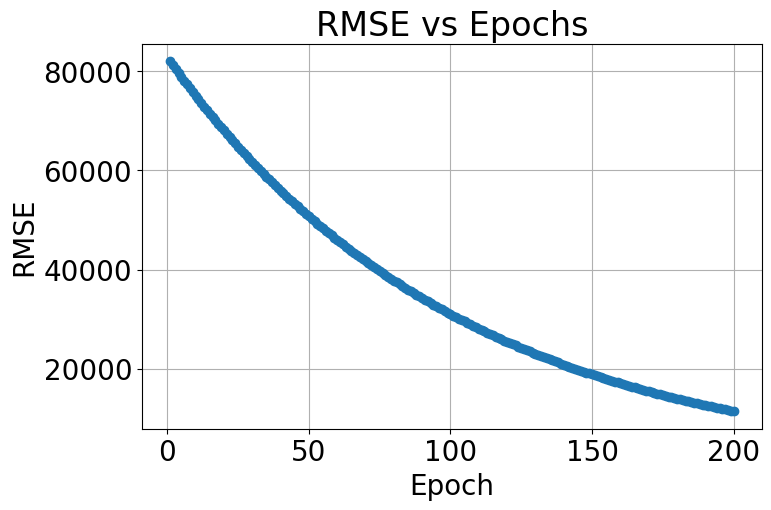

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Train a Gradient Boosting model with 200 epochs
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.01, random_state=42)

# Fit the model on the training set
model.fit(X_train, Y_train)

# Track RMSE on the validation set after each iteration
rmse_per_epoch = []

for y_pred in model.staged_predict(X_test):
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    rmse_per_epoch.append(rmse)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(rmse_per_epoch) + 1), rmse_per_epoch, marker='o')
plt.title('RMSE vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

As we can see from the plot graph, the RMSE droped through epochs.

For clarification, the RMSE is showing the error of the house prices.

,Model,Alpha,CV_avg_RMSE
5,Lasso,0.01,0.11
0,Ridge,0.01,0.12
1,Ridge,0.10,0.30
6,Lasso,0.10,0.41
10,ElasticNet,0.01,1.12
2,Ridge,1.00,2.73
7,Lasso,1.00,3.93
11,ElasticNet,0.10,10.38
3,Ridge,10.00,23.30
8,Lasso,10.00,33.49


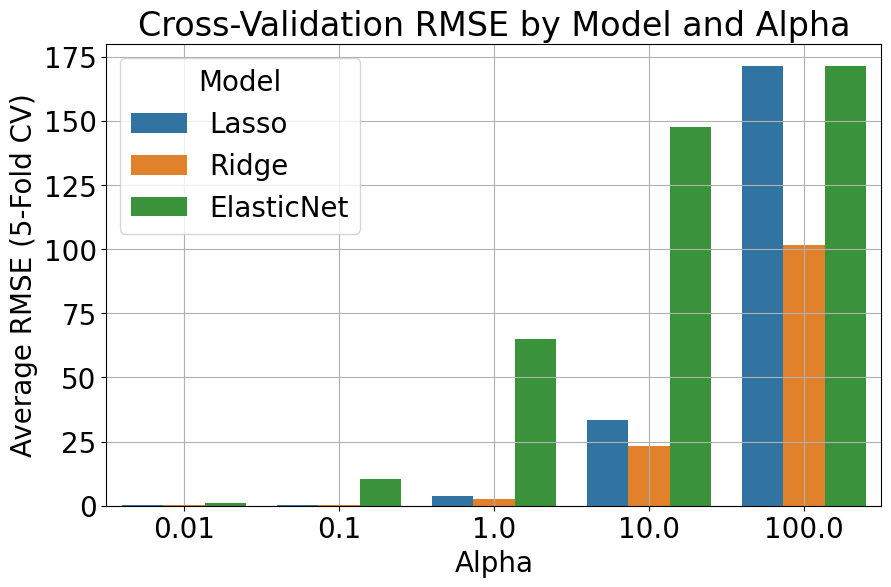

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import Ridge, Lasso, ElasticNet

models = {
    'Ridge': Ridge,
    'Lasso': Lasso,
    'ElasticNet': ElasticNet
}

# Multiple alphas
alphas = [0.01, 0.1, 1, 10, 100]
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

results = []

for model_name, model_class in models.items():
    for alpha in alphas:
        model = make_pipeline(
            StandardScaler(),
            model_class(alpha=alpha, random_state=42, max_iter=10000)
        )
        neg_mse_scores = cross_val_score(model, X, Y, cv=5, scoring=mse_scorer)
        rmse = np.sqrt(-neg_mse_scores.mean())
        results.append({
            'Model': model_name,
            'Alpha': alpha,
            'CV_avg_RMSE': round(rmse, 2)
        })

# Showing the table
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='CV_avg_RMSE')
display(results_df_sorted)

# Comperison graph
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df_sorted, x='Alpha', y='CV_avg_RMSE', hue='Model')
plt.title('Cross-Validation RMSE by Model and Alpha')
plt.xlabel('Alpha')
plt.ylabel('Average RMSE (5-Fold CV)')
plt.grid(True)
plt.show()


As we can see from the table and from the graph above, high Alpha values cause the model to be over-regulized. Therefore, choosing lower alpha value will give us a better model in all the three regularization techniques especially in Ridge model.